#**Naive Baye's Classifier**

Naïve Bayes algorithm is a supervised learning algorithm, which is based on Bayes theorem and used for solving classification problems.
It is mainly used in text classification that includes a high-dimensional training dataset.

Naïve Bayes Classifier is one of the simple and most effective Classification algorithms which helps in building the fast machine learning models that can make quick predictions.

It is a probabilistic classifier, which means it predicts on the basis of the probability of an object.

***Naïve-***It is called Naïve because it assumes that the occurrence of a certain feature is independent of the occurrence of other features. Such as if the fruit is identified on the bases of color, shape, and taste, then red, spherical, and sweet fruit is recognized as an apple. Hence each feature individually contributes to identify that it is an apple without depending on each other.

***Bayes-***It is called Bayes because it depends on the principle of Bayes' Theorem.

Naive Bayes classifiers are a collection of classification algorithms based on Bayes’ Theorem. It is not a single algorithm but a family of algorithms where all of them share a common principle, i.e. every pair of features being classified is independent of each other.

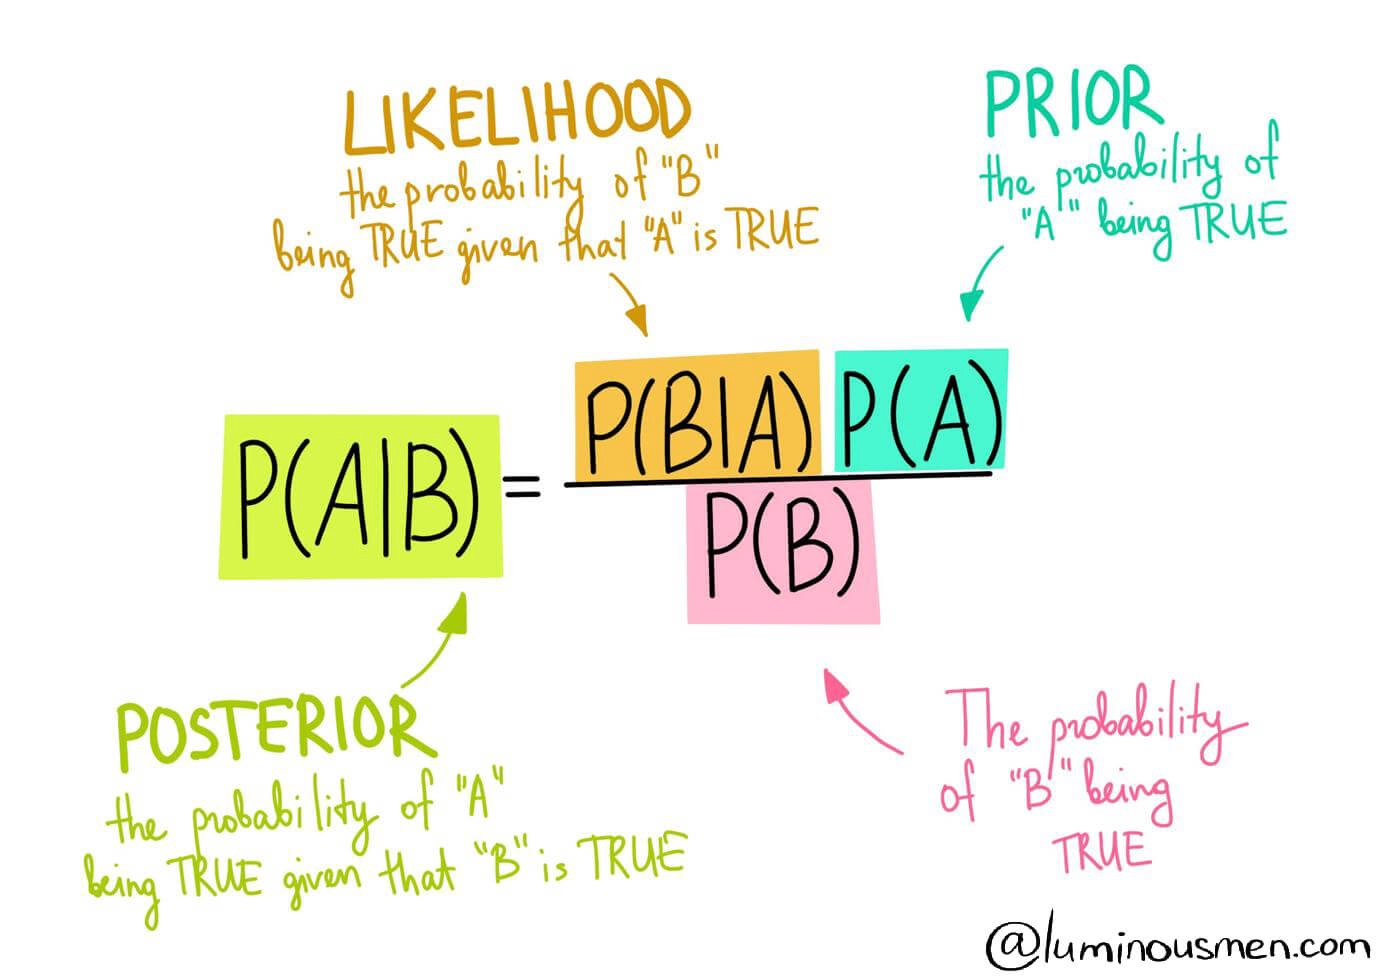


* **P(A|B) is Posterior probability**
* **P(B|A) is Likelihood probability**

Using Bayes theorem, we can find the probability of A happening, given that B has occurred. Here, B is the evidence and A is the hypothesis. The assumption made here is that the predictors/features are independent. That is presence of one particular feature does not affect the other. Hence it is called naive.

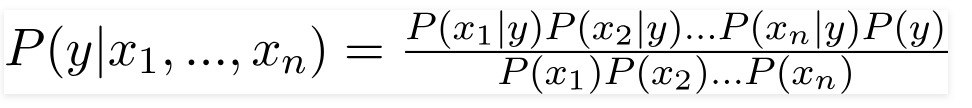

Here x_1,x_2….x_n represent the features, i.e they can be mapped to outlook, temperature, humidity and windy. By substituting for X and expanding using the chain rule we get,
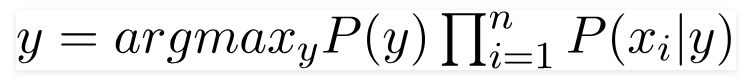

In our case, the class variable(y) has only two outcomes, yes or no. There could be cases where the classification could be multivariate. Therefore, we need to find the class y with maximum probability.

**Types of Naive Bayes Classifier:**

* **Multinomial**
This is mostly used for document classification problem, i.e whether a document belongs to the category of sports, politics, technology etc. The features/predictors used by the classifier are the frequency of the words present in the document.
* **Bernoulli**
This is similar to the multinomial naive bayes but the predictors are boolean variables. The parameters that we use to predict the class variable take up only values yes or no, for example if a word occurs in the text or not.
* **Gaussian**
When the predictors take up a continuous value and are not discrete, we assume that these values are sampled from a gaussian distribution.

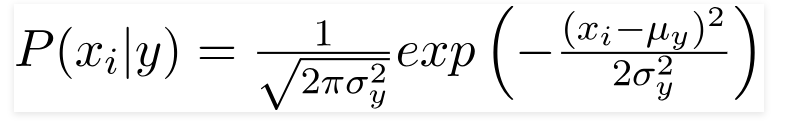

**Advantages of Naïve Bayes Classifier**

* Naïve Bayes is one of the fast and easy ML algorithms to predict a class of datasets.
* It can be used for Binary as well as Multi-class Classifications.
* It performs well in Multi-class predictions as compared to the other Algorithms.
* It is the most popular choice for text classification problems.

**Disadvantages of Naïve Bayes Classifier**

* Naive Bayes assumes that all features are independent or unrelated, so it cannot learn the relationship between features.

##**Using Numpy**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"
# /content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive

#changing the working directory
%cd /content/gdrive/My Drive/Kaggle

Mounted at /content/gdrive
/content/gdrive/My Drive/Kaggle


In [ ]:
!kaggle datasets download -d volodymyrgavrysh/fraud-detection-bank-dataset-20k-records-binary

#unzipping the zip files and deleting the zip files
!unzip \*.zip  && rm *.zip

  0% 0.00/738k [00:00<?, ?B/s]
100% 738k/738k [00:00<00:00, 62.1MB/s]
Archive:  fraud-detection-bank-dataset-20k-records-binary.zip
replace fraud_detection_bank_dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: fraud_detection_bank_dataset.csv  


In [ ]:
data=pd.read_csv('fraud_detection_bank_dataset.csv')
data

,Unnamed: 0,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,...,col_103,col_104,col_105,col_106,col_107,col_108,col_109,col_110,col_111,targets
0,0,9,1354,0,18,0,1,7,9,0,...,0,0,0,1,1,0,0,0,49,1
1,1,0,239,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,55,1
2,2,0,260,0,4,0,3,6,0,0,...,0,0,0,1,1,0,0,0,56,1
3,3,17,682,0,1,0,0,8,17,0,...,0,1,0,1,1,0,0,0,65,1
4,4,1,540,0,2,0,1,7,1,0,...,0,0,0,1,1,0,0,0,175,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20463,20463,0,88,0,0,0,2,-1,0,0,...,0,1,0,0,0,0,1,0,85,0
20464,20464,0,134,0,2,0,0,6,0,0,...,0,0,0,0,0,0,0,0,7,0
20465,20465,4,393,1,1,0,0,-1,4,0,...,0,1,0,0,0,0,0,0,45,0
20466,20466,0,10,0,1,0,0,-1,0,0,...,0,0,0,0,0,0,0,0,5,0


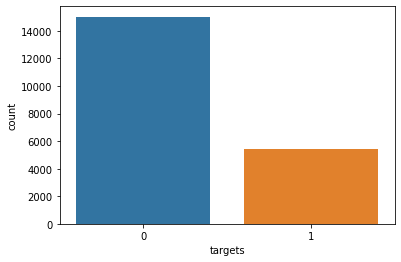

In [ ]:
# Countplot
sns.countplot(x='targets',data=data,orient="h")

In [ ]:
# Segeggrating X & Y
y=data[['targets']]
x=data.drop(['Unnamed: 0','targets'],axis=1)

x

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,col_102,col_103,col_104,col_105,col_106,col_107,col_108,col_109,col_110,col_111
0,9,1354,0,18,0,1,7,9,0,0,...,4,0,0,0,1,1,0,0,0,49
1,0,239,0,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,55
2,0,260,0,4,0,3,6,0,0,0,...,1,0,0,0,1,1,0,0,0,56
3,17,682,0,1,0,0,8,17,0,0,...,1,0,1,0,1,1,0,0,0,65
4,1,540,0,2,0,1,7,1,0,0,...,1,0,0,0,1,1,0,0,0,175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20463,0,88,0,0,0,2,-1,0,0,0,...,0,0,1,0,0,0,0,1,0,85
20464,0,134,0,2,0,0,6,0,0,0,...,1,0,0,0,0,0,0,0,0,7
20465,4,393,1,1,0,0,-1,4,0,0,...,0,0,1,0,0,0,0,0,0,45
20466,0,10,0,1,0,0,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,5


In [ ]:
# Dividing the Data into Classes
y0 = data[data.targets == 0]
y1 = data[data.targets == 1]
y1

,Unnamed: 0,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,...,col_103,col_104,col_105,col_106,col_107,col_108,col_109,col_110,col_111,targets
0,0,9,1354,0,18,0,1,7,9,0,...,0,0,0,1,1,0,0,0,49,1
1,1,0,239,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,55,1
2,2,0,260,0,4,0,3,6,0,0,...,0,0,0,1,1,0,0,0,56,1
3,3,17,682,0,1,0,0,8,17,0,...,0,1,0,1,1,0,0,0,65,1
4,4,1,540,0,2,0,1,7,1,0,...,0,0,0,1,1,0,0,0,175,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5433,5433,4,836,0,0,0,1,7,4,0,...,0,1,0,0,0,0,0,0,52,1
5434,5434,0,309,1,0,1,6,2,0,0,...,0,1,0,1,1,0,1,4,353,1
5435,5435,0,32,0,1,0,0,5,0,0,...,0,0,0,0,0,0,0,0,10,1
5436,5436,0,44,0,0,2,0,5,0,0,...,0,1,0,0,0,0,0,0,52,1


In [ ]:
# Calculate the Priors P(0 | X) & P(1 | X)
P_0_X = len(y0) / len(y)
P_1_X = len(y1) / len(y)
print(P_1_B, P_B)

0.7343169826069963 0.2656830173930037


In [ ]:
# Fit a Probability Distribution Function (PDF) for P(0 | X) & P(1 | X)
def PDF(x):
	# estimate parameters
	mu = np.mean(x)
	sigma = np.std(x)
	print(mu, sigma)
	# fit distribution
	dist = np.random.normal(mu, sigma)
	return dist
PDF(data)

Unnamed: 0    10233.500000
col_0             3.226256
col_1           294.793043
col_2             0.420021
col_3             2.329343
                  ...     
col_108           0.000049
col_109           0.049345
col_110           0.024282
col_111          43.486125
targets           0.265683
Length: 114, dtype: float64 Unnamed: 0    5908.602648
col_0           20.563806
col_1          717.524456
col_2            7.367095
col_3           10.068266
                 ...     
col_108          0.006990
col_109          0.216588
col_110          0.305072
col_111         59.216113
targets          0.441696
Length: 114, dtype: float64


array([ 1.06156385e+04, -1.33470580e+01,  4.74126432e+02,  1.97638046e+01,
       -1.35046192e+01, -4.09014838e-01,  6.34869494e+00,  3.16063336e+00,
        6.01539753e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  6.51725773e-02,  6.65558395e-01,
        3.59413918e-01,  1.05306819e+00, -5.75040503e+02,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -1.50834140e+01,
       -1.02175651e+02, -1.45859796e+01,  1.13749867e+00, -5.67202737e+00,
        3.40448195e-01,  9.99447597e-01,  1.59108604e+00,  2.14918684e+00,
       -3.41685115e+00,  5.20920388e+00, -3.35193825e-01, -4.03919206e+00,
        0.00000000e+00,  1.17887802e+03,  1.60043312e+00,  4.82957836e+02,
       -1.21051389e-02, -9.18034453e-01,  4.49661951e+00, -4.26144104e+01,
       -2.29931227e+00,  2.17156849e+01, -4.49069663e-01, -1.25593361e-02,
        6.48801557e+02, -6.16366208e+01, -1.57123796e+02,  5.01675252e+03,
        0.00000000e+00,  

In [ ]:
# Create PDFs for P(0 | X) & P(1 | X)
P_0_X=PDF(y0)
P_1_X=PDF(y1)
P_0_X

Unnamed: 0    12952.500000
col_0             3.733666
col_1           342.120825
col_2             0.536926
col_3             2.908383
                  ...     
col_108           0.000067
col_109           0.027611
col_110           0.011244
col_111          34.138257
targets           0.000000
Length: 114, dtype: float64 Unnamed: 0    4338.787263
col_0           14.214376
col_1          736.138810
col_2            8.491062
col_3           11.531798
                 ...     
col_108          0.008157
col_109          0.163857
col_110          0.138209
col_111         49.688845
targets          0.000000
Length: 114, dtype: float64
Unnamed: 0    2718.500000
col_0            1.823832
col_1          163.984553
col_2            0.096911
col_3            0.728944
                 ...     
col_108          0.000000
col_109          0.109415
col_110          0.060316
col_111         69.322545
targets          1.000000
Length: 114, dtype: float64 Unnamed: 0    1569.815355
col_0           32.10

array([ 1.08060504e+04,  2.01575145e+01,  1.03813549e+03,  4.12637947e+00,
        1.14422802e+01, -1.10547426e-01, -7.38430409e+00,  4.05182303e+00,
        2.24403605e+01,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  1.43443858e-01,  4.22948115e-02,
        1.15633252e+00,  3.01879858e-01, -3.28696819e+03,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  9.61733265e+00,
        1.02015895e+02,  1.14989961e+01,  2.68934185e+00, -9.92325697e-02,
        4.72264320e-01,  9.98974917e-01,  1.20546080e+00,  5.30525950e+01,
        6.93221828e-01,  3.81108008e+00,  1.96293683e-01,  1.45870021e+01,
        0.00000000e+00, -6.76146618e+01, -1.63496942e+01, -5.65663169e+02,
       -2.62339522e-02, -3.61560954e-01,  2.84136241e+00,  5.99324703e+01,
       -2.98922447e+00, -4.62978219e+00, -1.11072737e+00,  6.44495963e-01,
       -3.22930827e+01, -2.35919111e+01, -3.89283102e+02, -5.14398115e+01,
        0.00000000e+00,  

In [ ]:
# Calculate Posterior Probabilities P(A | B) & P(A | 1-B)
posterior0 = P_0_X + np.sum(P_0_X)
posterior1 = P_1_X + np.sum(P_1_X)
max(posterior0.all(),posterior1.all())



True

##**Using Sklearn**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"
# /content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive

#changing the working directory
%cd /content/gdrive/My Drive/Kaggle

Mounted at /content/gdrive
/content/gdrive/My Drive/Kaggle


In [ ]:
!kaggle datasets download -d volodymyrgavrysh/fraud-detection-bank-dataset-20k-records-binary

#unzipping the zip files and deleting the zip files
!unzip \*.zip  && rm *.zip

  0% 0.00/738k [00:00<?, ?B/s]
100% 738k/738k [00:00<00:00, 60.8MB/s]
Archive:  fraud-detection-bank-dataset-20k-records-binary.zip
replace fraud_detection_bank_dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: fraud_detection_bank_dataset.csv  


In [ ]:
data=pd.read_csv('fraud_detection_bank_dataset.csv')
data

,Unnamed: 0,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,...,col_103,col_104,col_105,col_106,col_107,col_108,col_109,col_110,col_111,targets
0,0,9,1354,0,18,0,1,7,9,0,...,0,0,0,1,1,0,0,0,49,1
1,1,0,239,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,55,1
2,2,0,260,0,4,0,3,6,0,0,...,0,0,0,1,1,0,0,0,56,1
3,3,17,682,0,1,0,0,8,17,0,...,0,1,0,1,1,0,0,0,65,1
4,4,1,540,0,2,0,1,7,1,0,...,0,0,0,1,1,0,0,0,175,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20463,20463,0,88,0,0,0,2,-1,0,0,...,0,1,0,0,0,0,1,0,85,0
20464,20464,0,134,0,2,0,0,6,0,0,...,0,0,0,0,0,0,0,0,7,0
20465,20465,4,393,1,1,0,0,-1,4,0,...,0,1,0,0,0,0,0,0,45,0
20466,20466,0,10,0,1,0,0,-1,0,0,...,0,0,0,0,0,0,0,0,5,0


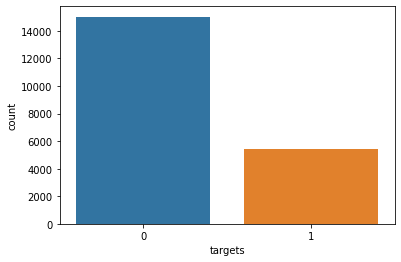

In [ ]:
# Countplot
sns.countplot(x='targets',data=data,orient="h")

In [ ]:
# Segeggrating X & Y
y=data[['targets']]
x=data.drop(['Unnamed: 0','targets'],axis=1)

x

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,col_102,col_103,col_104,col_105,col_106,col_107,col_108,col_109,col_110,col_111
0,9,1354,0,18,0,1,7,9,0,0,...,4,0,0,0,1,1,0,0,0,49
1,0,239,0,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,55
2,0,260,0,4,0,3,6,0,0,0,...,1,0,0,0,1,1,0,0,0,56
3,17,682,0,1,0,0,8,17,0,0,...,1,0,1,0,1,1,0,0,0,65
4,1,540,0,2,0,1,7,1,0,0,...,1,0,0,0,1,1,0,0,0,175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20463,0,88,0,0,0,2,-1,0,0,0,...,0,0,1,0,0,0,0,1,0,85
20464,0,134,0,2,0,0,6,0,0,0,...,1,0,0,0,0,0,0,0,0,7
20465,4,393,1,1,0,0,-1,4,0,0,...,0,0,1,0,0,0,0,0,0,45
20466,0,10,0,1,0,0,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,5


In [ ]:
# Train Test Split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)
x_train.shape

(15351, 112)

###**1-Bernoulli NB**

In [ ]:
from sklearn.naive_bayes import BernoulliNB
bnb=BernoulliNB()
bnb.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BernoulliNB()

In [ ]:
bnb.class_count_

array([11255.,  4096.])

In [ ]:
bnb.classes_

array([0, 1])

In [ ]:
y_pred=bnb.predict(x_test)
y_pred

array([0, 1, 1, ..., 1, 1, 0])

In [ ]:
# Calculating the F1 Score
from sklearn.metrics import f1_score
s=f1_score(y_pred,y_test)
s

0.6289237668161436

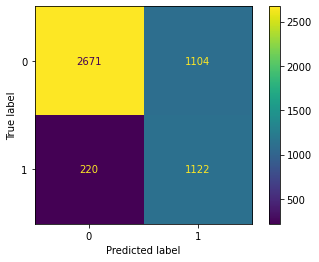

In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=bnb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels= bnb.classes_)
disp.plot()

###**2-Gaussian NB**

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [ ]:
gnb.classes_

array([0, 1])

In [ ]:
gnb.theta_

array([[3.74429143e+00, 3.43782763e+02, 5.71923590e-01, 2.81457130e+00,
        8.07641048e-02, 8.05508663e-01, 2.43580631e+00, 3.74429143e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 3.98045313e-02, 4.40159929e-01, 3.19413594e-01,
        4.42203465e-01, 1.64256864e+02, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 4.90039982e+00, 4.00902710e+01,
        3.42123501e+00, 3.20915149e+00, 1.16890271e+00, 3.85606397e-02,
        9.99911151e-01, 1.31043980e+00, 7.30048867e+00, 2.85206575e-01,
        5.29631275e-01, 8.26299422e-02, 2.84904487e+00, 0.00000000e+00,
        1.72156375e+01, 2.23065304e+00, 2.06919236e+02, 1.42159040e-03,
        1.26166148e-02, 8.02221235e-01, 7.16703687e+00, 4.01243892e-01,
        9.32296757e-01, 1.15326522e-01, 3.97156819e-02, 2.05832963e+01,
        3.13824967e+00, 2.86136828e+01, 1.32432697e+01, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 2.35781786e+02, 9.713816

In [ ]:
# Calculating the F1 Score
from sklearn.metrics import f1_score
s=f1_score(y_pred,y_test)
s

0.6289237668161436

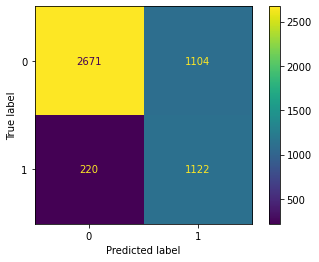

In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=gnb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels= gnb.classes_)
disp.plot()